In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

pokemon_df = pd.read_csv("../../data/pokemon.csv")

ansur_male = pd.read_csv("../../data/ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("../../data/ANSUR_II_FEMALE.csv")

ansur = pd.concat([ansur_male, ansur_female])
ansur["body_height"] = ansur["acromialheight"]
ansur_df_1 = ansur[["Gender", "weight_kg", "stature_m", "body_height"]][:200]
ansur_df_2 = ansur[["Gender", "footlength", "headlength"]][:200]
ansur_df_2["n_legs"] = 2

## Removing features without variance
### A sample of the Pokemon dataset has been loaded as pokemon_df. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

### Instructions 1/3
-    Use the .describe() method to find the numeric feature without variance and remove its name from the list assigned to number_cols.

In [17]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

### Instructions 2/3
-    Combine the two lists of feature names to sub-select the chosen features from pokemon_df.

In [18]:
pokemon_df["Type"] = pokemon_df["Type 1"]

In [19]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type', 'Legendary']

# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


### Instructions 3/3
-    Find the non-numeric feature without variance and remove its name from the list assigned to non_number_cols.

In [20]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


## Visually detecting redundant features
### Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

### Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

### Seaborn has been imported as sns.

### Instructions 1/4
-    Create a pairplot of the ansur_df_1 data sample and color the points using the 'Gender' feature.

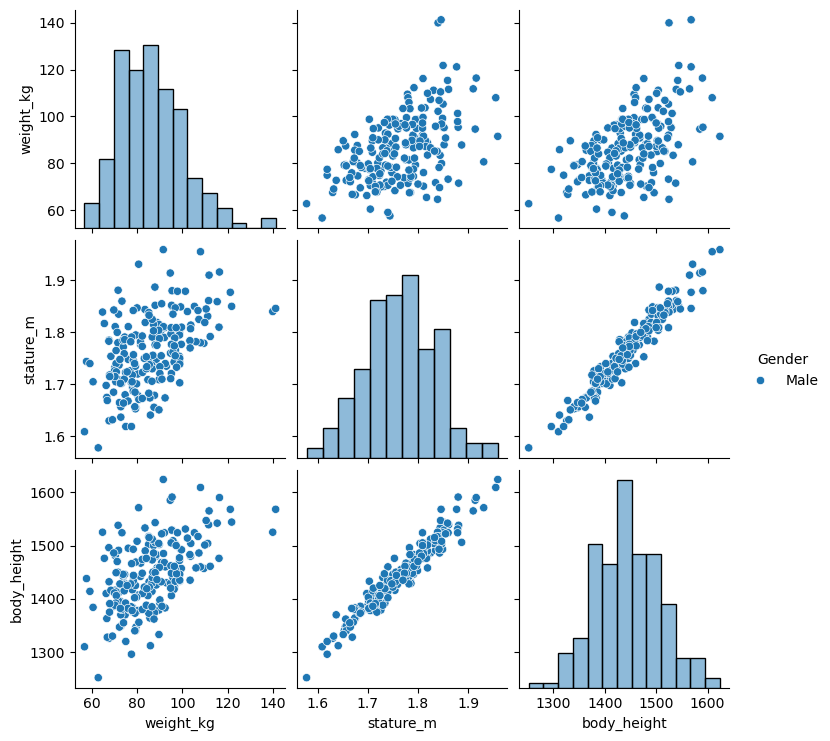

In [21]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

### Instructions 2/4
-    Two features are basically duplicates, remove one of them from the dataset.

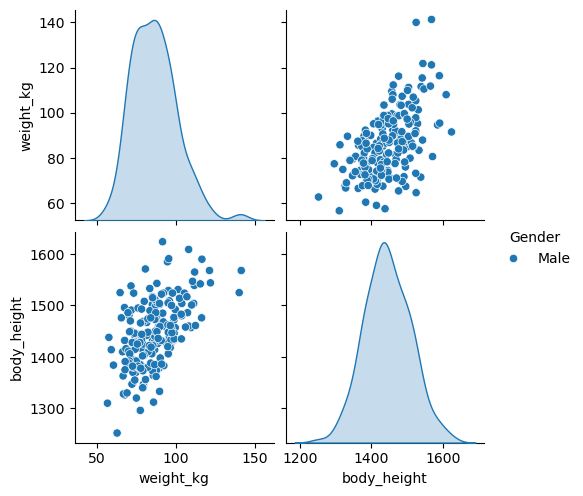

In [22]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop(['stature_m'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

### Instructions 3/4
-    Now create a pairplot of the ansur_df_2 data sample and color the points using the 'Gender' feature.

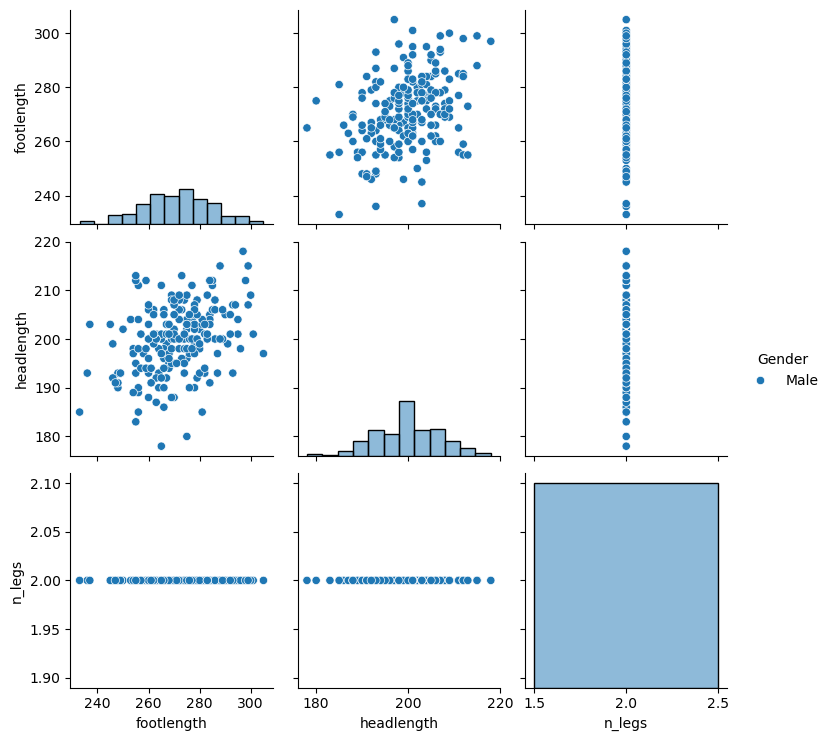

In [8]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

### Instructions 4/4
-    One feature has no variance, remove it from the dataset.

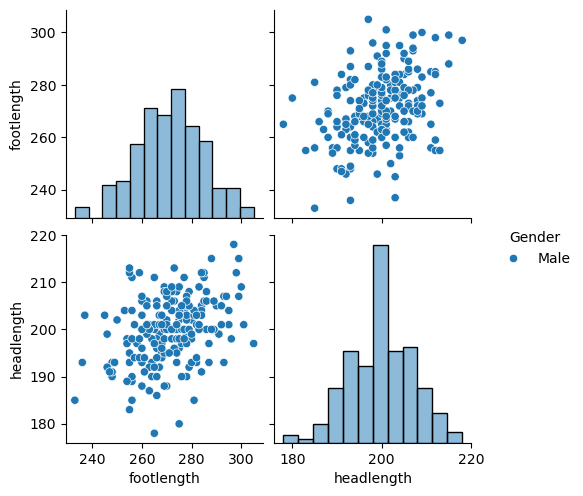

In [9]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop(["n_legs"], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

## Fitting t-SNE to the ANSUR data
### t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to this numeric dataset.

### Instructions
-    Drop the non-numeric columns from the dataset.
-    Create a TSNE model with learning rate 50.
-    Fit and transform the model on the numeric dataset.

In [10]:
from sklearn.manifold import TSNE
cols = ['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']
df = pd.concat([ansur_male, ansur_female])
df = df[cols]

In [11]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


## t-SNE visualisation of dimensionality
### Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('x' and 'y') which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

### seaborn has already been imported as sns and matplotlib.pyplot as plt.

### Instructions 1/3
-    Use seaborn's sns.scatterplot to create the plot.
-    Color the points by 'Component'.

In [12]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

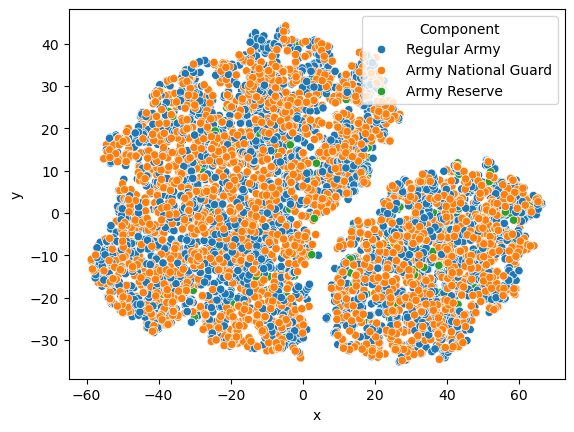

In [13]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

### Instructions 2/3
-    Color the points of the scatterplot by 'Branch'

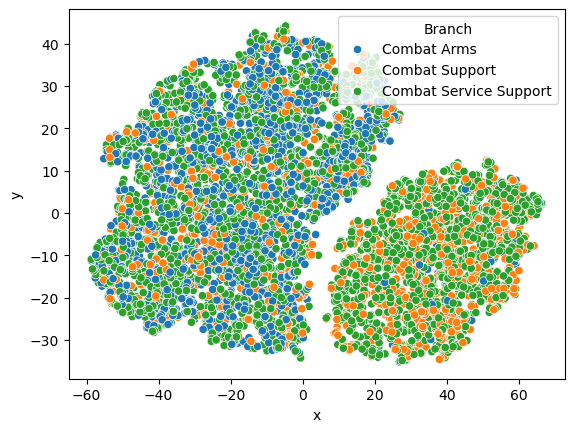

In [14]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

### Instructions 3/3
-    Color the points of the scatterplot by 'Gender'.

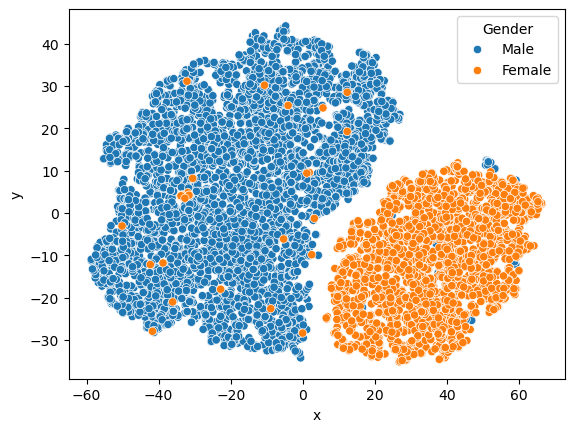

In [15]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()